In [1]:
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
import numpy as np

E:\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Importing Data:

In [2]:
def get_tech_list(tech_list, startdate, enddate):
    def data(ticker):
        return DataReader(ticker,'yahoo', start=startdate, end=enddate)
    datas = map (data, tech_list)
    return (pd.concat(datas, keys=tech_list, axis=0, names=['company_name'])) 
    
# Taken stocks of 6 tech companies (Apple, Microsoft, Google, Amazon, Tesla, Oracle)
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'ORCL']
end = datetime.now()
start = datetime(2000, 1, 1)
# Getting the stock data
all_data = get_tech_list(tech_list, start, end).to_csv("techlist.csv")
df = pd.read_csv(r'C:\Users\Yura\Desktop\EDA\techlist.csv')
df.head()

,company_name,Date,High,Low,Open,Close,Volume,Adj Close
0,AAPL,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855168
1,AAPL,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783068
2,AAPL,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.794528
3,AAPL,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.725771
4,AAPL,2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.760149


### Data Frame ‘Company_name’, ‘Date’, ‘High’, ‘Low’, ‘Open’ ,‘Close’, ‘Volume’, ‘Adj. Close’. 
* Volume is the number of shares that changed hands (Traded) during a given day. 
* Adj closing price (used to examine historical returns) factors in anything that might affect the stock price after the market is closed.

In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, ORCL]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESLA', 'ORACLE']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.sample(100)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2007-08-29,79.050003,76.860001,76.959999,79.050003,5076800.0,79.050003,AMAZON
2003-12-15,27.100000,26.680000,27.049999,26.740000,88860600.0,17.173594,MICROSOFT
2012-12-28,6.730000,6.604000,6.676000,6.644000,2070500.0,6.644000,TESLA
2020-03-31,1175.310059,1138.140015,1147.300049,1162.810059,2486400.0,1162.810059,GOOGLE
2006-12-05,39.299999,38.720001,39.130001,38.980000,5737700.0,38.980000,AMAZON
...,...,...,...,...,...,...,...
2014-09-25,328.540009,321.399994,327.989990,321.929993,2928800.0,321.929993,AMAZON
2012-02-27,305.036652,301.400269,302.162415,303.517334,3641300.0,303.517334,GOOGLE
2015-10-30,30.305000,29.862499,30.247499,29.875000,197461200.0,27.336546,APPLE


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-12-07,60.200001,59.630001,59.959999,59.799999,14922900.0,59.799999,ORACLE
2020-12-08,59.709999,58.220001,58.990002,59.029999,15237800.0,59.029999,ORACLE
2020-12-09,59.910000,58.799999,58.889999,59.730000,12204100.0,59.730000,ORACLE
2020-12-10,59.810001,59.040001,59.509998,59.480000,14219900.0,59.480000,ORACLE
2020-12-11,61.000000,59.419998,60.939999,60.610001,16209000.0,60.610001,ORACLE


In [7]:
df.dtypes

High            float64
Low             float64
Open            float64
Close           float64
Volume          float64
Adj Close       float64
company_name     object
dtype: object

In [8]:
df.shape

(27827, 7)

In [9]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,27827.000000,27827.000000,27827.000000,27827.000000,2.782700e+04,27827.000000
mean,194.803195,190.499156,192.715951,192.727994,1.056826e+08,190.817982
std,414.746762,405.469606,410.341795,410.267654,2.381424e+08,411.016018
min,0.235536,0.227143,0.231964,0.234286,7.900000e+03,0.200465
25%,21.799999,21.200001,21.500000,21.530001,6.934600e+06,17.130091
50%,39.875000,38.830002,39.340000,39.324001,2.586910e+07,36.815979
75%,143.255539,139.165001,140.873001,141.050003,6.843720e+07,140.807220
max,3552.250000,3486.689941,3547.000000,3531.449951,7.421641e+09,3531.449951


In [10]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name'], dtype='object')

In [11]:
df.nunique()

High            19015
Low             19095
Open            19186
Close           19660
Volume          27184
Adj Close       24801
company_name        6
dtype: int64

In [12]:
#cleaning the data
#check the missing data
df.isnull().sum()

High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64

In [13]:
df.duplicated()

Date
2000-01-03    False
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07    False
              ...  
2020-12-07    False
2020-12-08    False
2020-12-09    False
2020-12-10    False
2020-12-11    False
Length: 27827, dtype: bool

In [14]:
# Described Apple’s stock data
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5271.000000,5271.000000,5271.000000,5271.000000,5.271000e+03,5271.000000
mean,18.643934,18.248464,18.447380,18.453766,4.455316e+08,17.324491
std,23.470846,22.910639,23.192272,23.203776,3.918408e+08,22.903915
min,0.235536,0.227143,0.231964,0.234286,2.019780e+07,0.200465
25%,1.363393,1.329554,1.346964,1.350357,1.775160e+08,1.155427
50%,9.242143,8.948215,9.138928,9.081429,3.334744e+08,7.770482
75%,27.850000,27.223750,27.533751,27.487499,5.934530e+08,25.358761
max,137.979996,130.529999,137.589996,134.179993,7.421641e+09,133.948898


In [15]:
# Described Google's stock data
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4109.000000,4109.000000,4109.000000,4109.000000,4.109000e+03,4109.000000
mean,551.947007,541.312836,546.665151,546.774399,6.787137e+06,546.774399
std,406.488372,398.732740,402.352376,402.808540,7.935157e+06,402.808540
min,50.680038,47.800831,49.409801,49.818268,7.900000e+03,49.818268
25%,243.771286,238.740143,240.966797,240.887100,1.693300e+06,240.887100
50%,352.588409,345.445190,348.693024,348.394135,4.096000e+06,348.394135
75%,788.929993,778.091003,782.739990,783.219971,8.682500e+06,783.219971
max,1847.199951,1822.650024,1824.520020,1827.989990,8.254150e+07,1827.989990


In [16]:
# Described Microsofts stock data
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5271.000000,5271.000000,5271.000000,5271.000000,5.271000e+03,5271.000000
mean,49.571564,48.529842,49.055566,49.062941,5.455622e+07,42.732430
std,42.161511,41.249565,41.725652,41.735883,3.128817e+07,43.625793
min,15.620000,14.870000,15.200000,15.150000,7.425600e+06,11.608222
25%,26.950001,26.400000,26.690001,26.670000,3.233470e+07,19.106377
50%,30.500000,29.900000,30.160000,30.170000,4.980320e+07,22.469763
75%,50.450001,49.520000,49.882500,49.885000,6.804035e+07,43.011765
max,232.860001,227.350006,229.270004,231.649994,5.910522e+08,231.045105


In [17]:
# Described Amazon's stock data
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5271.000000,5271.000000,5271.000000,5271.000000,5.271000e+03,5271.000000
mean,470.570421,459.592496,465.385625,465.316868,6.479667e+06,465.316868
std,713.556682,696.559612,705.758436,705.305723,5.115542e+06,705.305723
min,6.100000,5.510000,5.910000,5.970000,8.813000e+05,5.970000
25%,42.500000,40.865000,41.490002,41.650000,3.632000e+06,41.650000
50%,134.710007,131.179993,132.850006,133.000000,5.360600e+06,133.000000
75%,536.170013,522.434998,529.220001,529.559998,7.735350e+06,529.559998
max,3552.250000,3486.689941,3547.000000,3531.449951,1.043292e+08,3531.449951


In [18]:
# Described Tesla's stock data
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2634.000000,2634.000000,2634.000000,2634.000000,2.634000e+03,2634.000000
mean,59.122771,56.499357,57.833938,57.892295,3.051229e+07,57.892295
std,85.830866,80.987843,83.461340,83.707373,2.826340e+07,83.707373
min,3.326000,2.996000,3.228000,3.160000,5.925000e+05,3.160000
25%,7.579000,7.334500,7.379000,7.400500,1.069138e+07,7.400500
50%,45.088001,43.656000,44.399000,44.320000,2.400525e+07,44.320000
75%,61.487001,59.255999,60.395501,60.506499,3.958138e+07,60.506499
max,654.320007,618.500000,653.690002,649.880005,3.046940e+08,649.880005


In [19]:
# Described Oracle's stock data
ORCL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5271.000000,5271.000000,5271.000000,5271.000000,5.271000e+03,5271.000000
mean,29.817550,29.111318,29.457300,29.461548,3.082056e+07,26.837873
std,14.315557,14.152601,14.227571,14.231587,2.044556e+07,14.193025
min,7.960000,7.250000,7.390000,7.320000,3.331700e+06,6.291211
25%,16.551250,15.750000,16.185000,16.134999,1.541775e+07,13.867306
50%,29.360001,28.540001,29.000000,28.900000,2.727580e+07,25.353567
75%,40.985001,40.205000,40.562500,40.635000,4.056175e+07,37.083496
max,62.599998,61.070000,62.459999,61.459999,2.240888e+08,61.459999


#### (2000-2020)

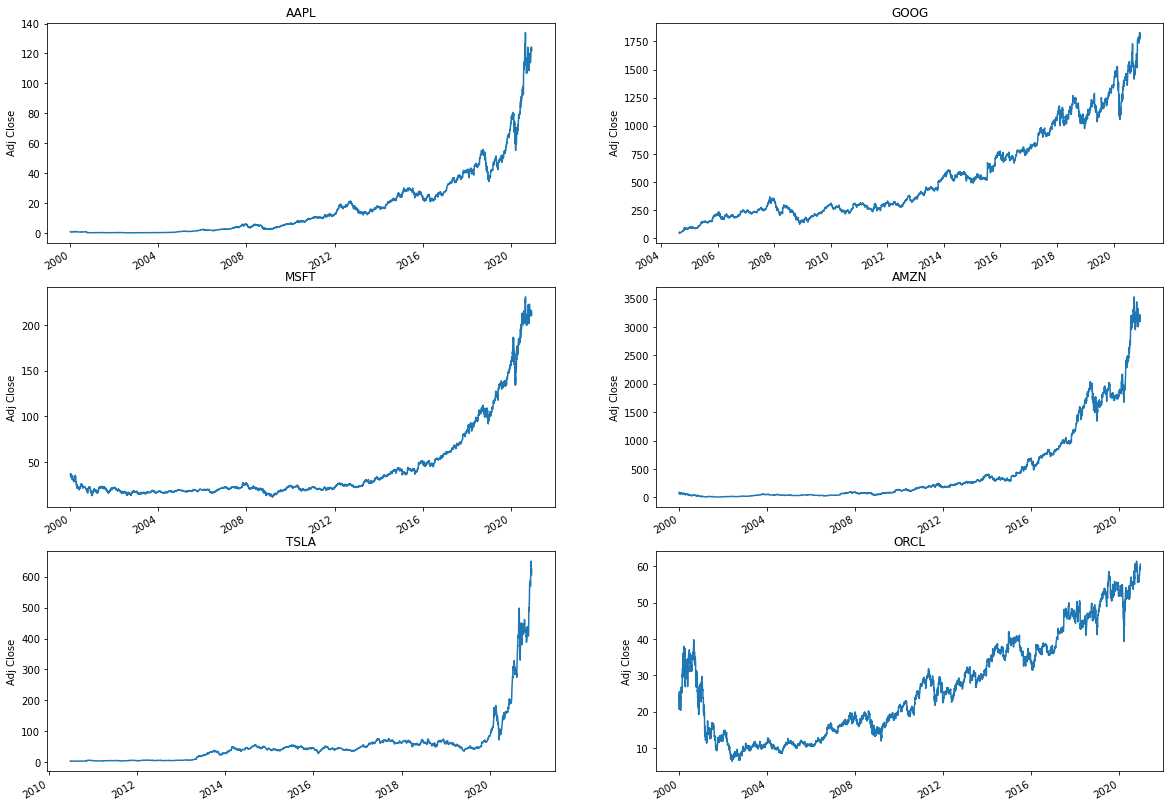

In [20]:
# To see a historical view of the closing price. For historical view I’ll be using Adj. Closing price
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'{tech_list[i - 1]}')

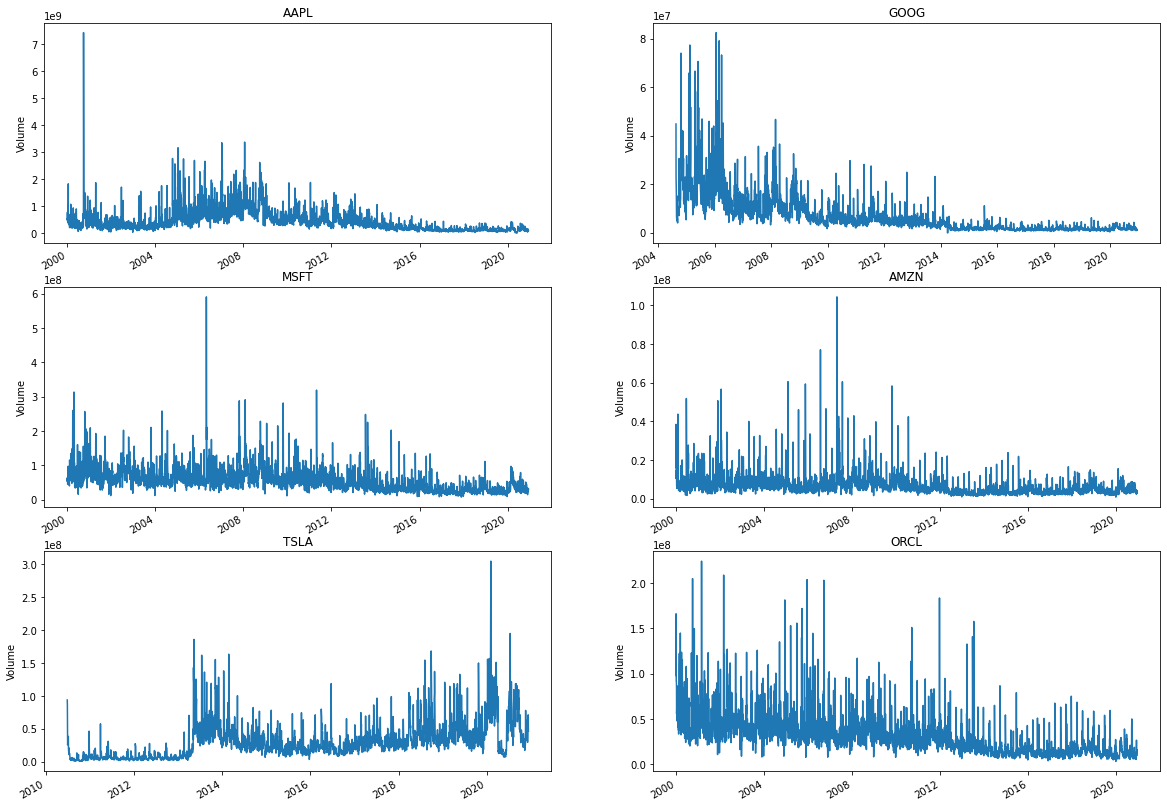

In [21]:
# For plotting the total volume of stock being traded each day
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'{tech_list[i - 1]}')

### Moving Average:

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name'], dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days'],
      dtype='object')
Index

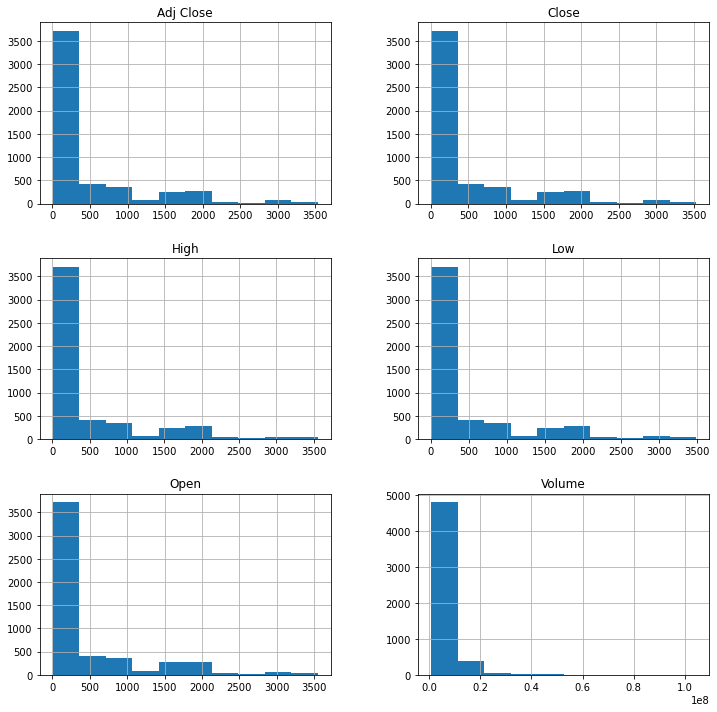

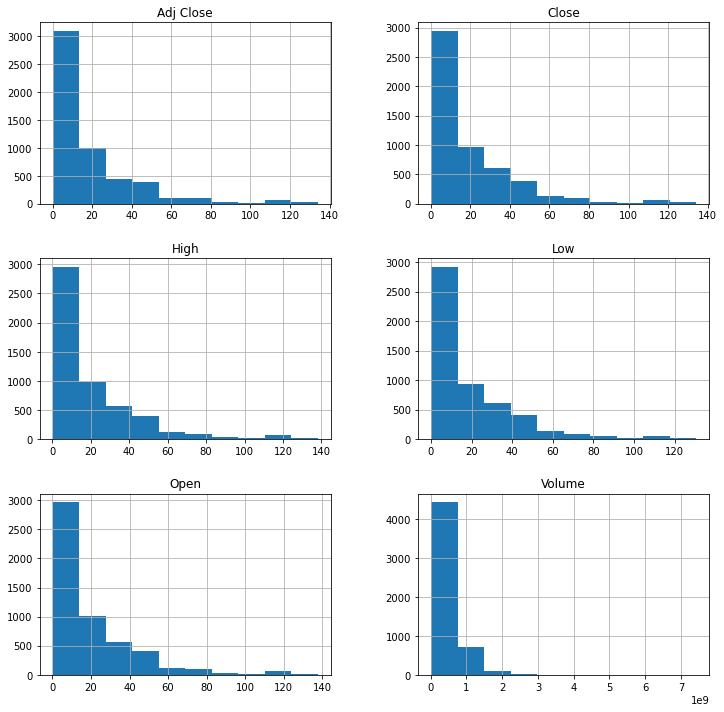

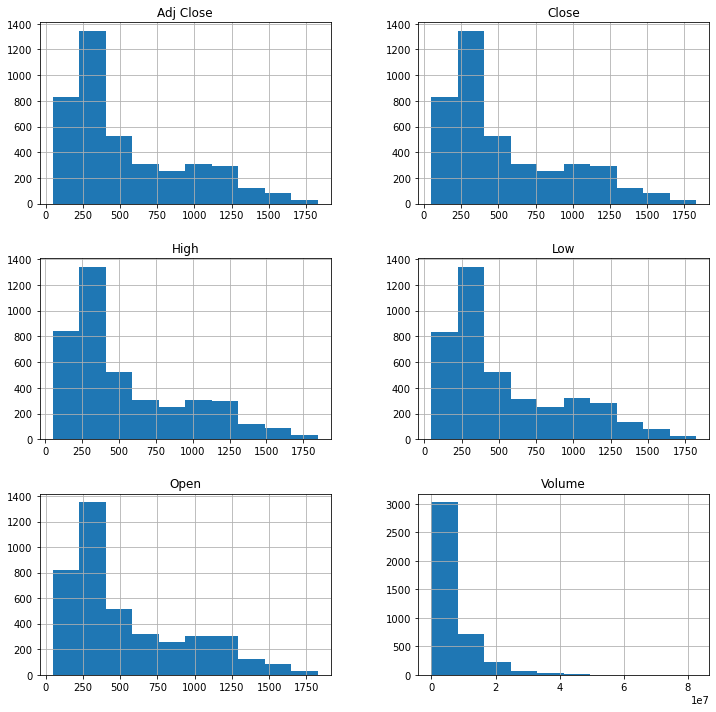

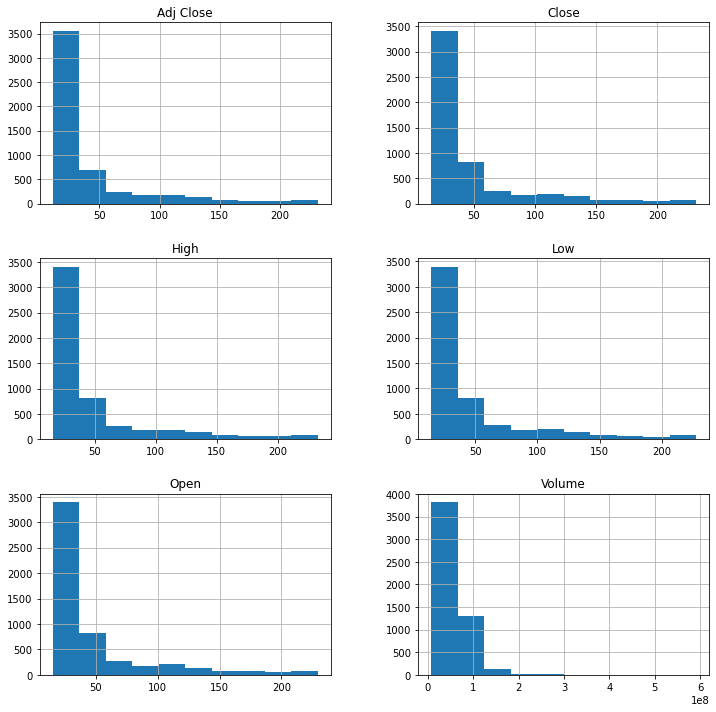

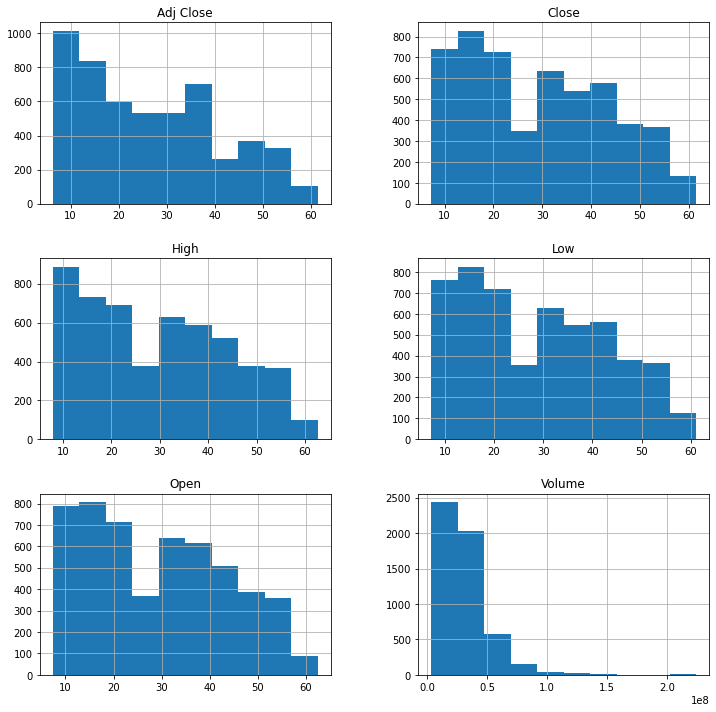

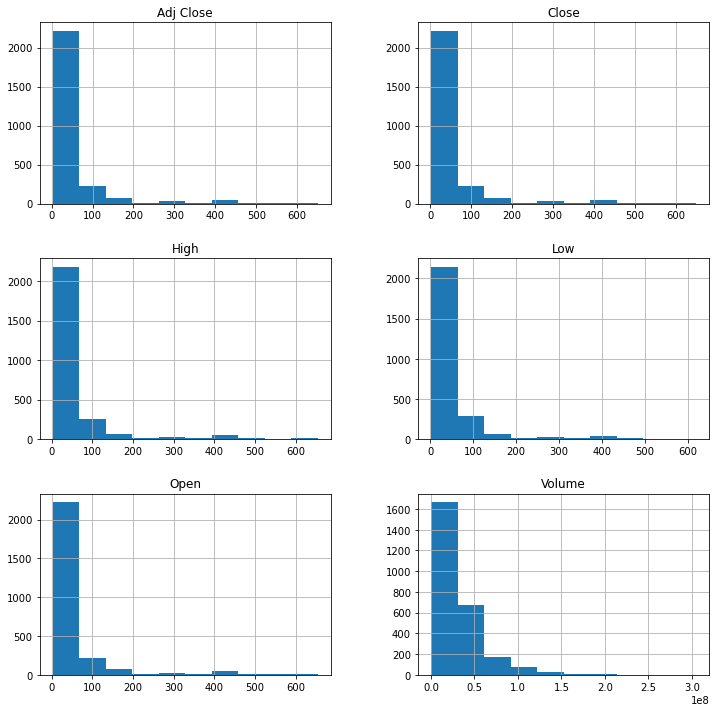

In [22]:
# Calculating Moving Average with lag of 10, 20, 50 days.
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        print(GOOG.columns)
df.groupby('company_name').hist(figsize=(12, 12));

In [23]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855168,APPLE,NaN,NaN,NaN
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783068,APPLE,NaN,NaN,NaN
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.794528,APPLE,NaN,NaN,NaN
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.725771,APPLE,NaN,NaN,NaN
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.760149,APPLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-07,124.570000,122.250000,122.309998,123.750000,86712000.0,123.750000,APPLE,119.543000,118.9690,117.028493
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,124.379997,APPLE,120.596000,119.3720,117.220853
2020-12-09,125.949997,121.000000,124.529999,121.779999,115089200.0,121.779999,APPLE,121.257000,119.6625,117.378582


### Below is the subplot of tech companies with moving average of 10 days, 20 days and 50 days:

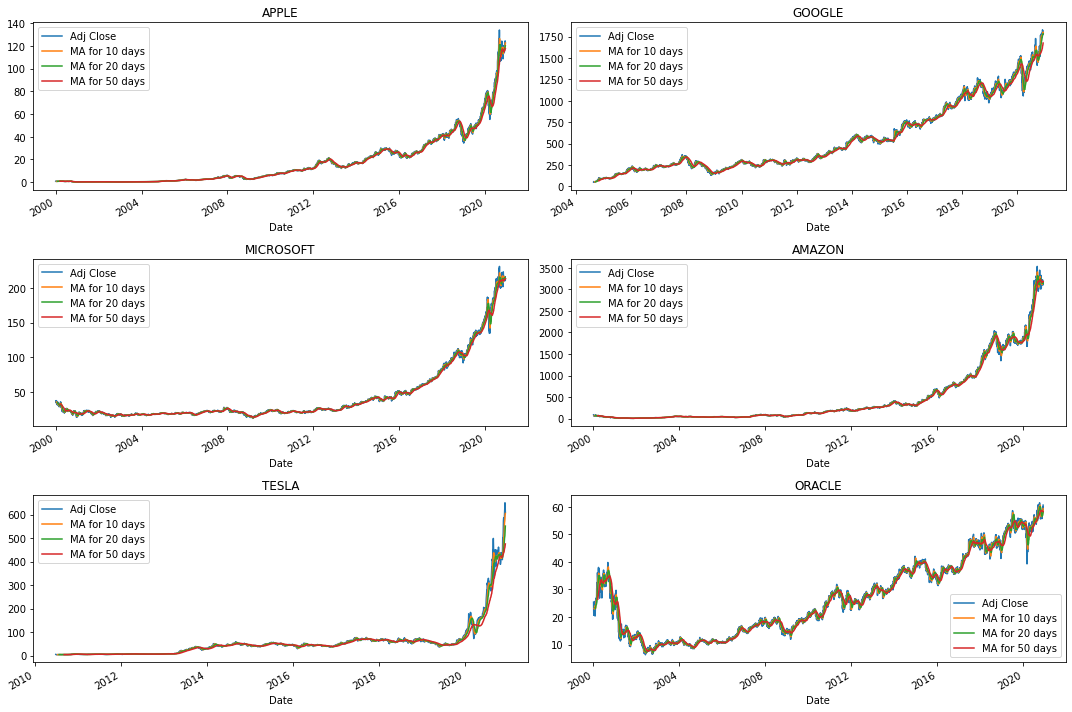

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('TESLA')
ORCL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('ORACLE')
fig.tight_layout()

### Percent change of daily returns Adj. close column:

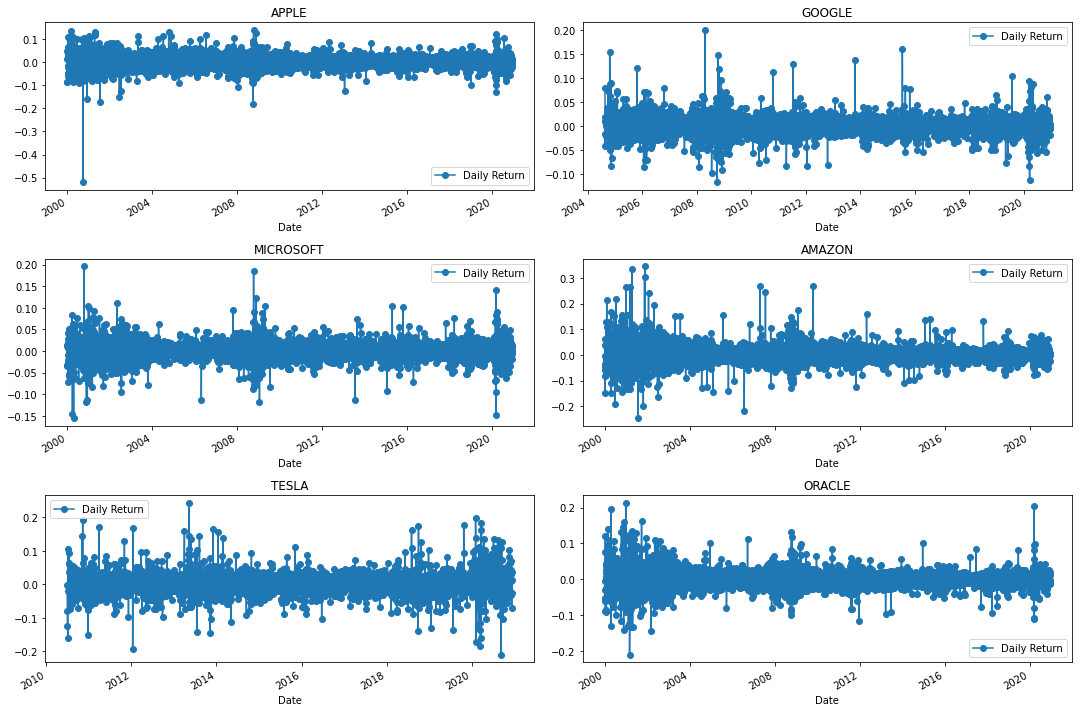

In [25]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# To plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMAZON')
TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='-', marker='o')
axes[2,0].set_title('TESLA')
ORCL['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='-', marker='o')
axes[2,1].set_title('ORACLE')
fig.tight_layout()

### Creating a new DataFrame for Closing prices:

In [26]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,ORCL
Date,,,,,,
2020-12-07,123.750000,1819.479980,214.289993,3158.000000,641.760010,59.799999
2020-12-08,124.379997,1818.550049,216.009995,3177.290039,649.880005,59.029999
2020-12-09,121.779999,1784.130005,211.800003,3104.199951,604.479980,59.730000
2020-12-10,123.239998,1775.329956,210.520004,3101.489990,627.070007,59.480000
2020-12-11,122.410004,1781.770020,213.259995,3116.419922,609.989990,60.610001


In [27]:
# Making a new DataFrame for returns
tech_rets = closing_df.pct_change()
tech_rets.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,ORCL
Date,,,,,,
2020-12-07,0.012270,-0.004655,-0.000327,-0.001448,0.071314,-0.002668
2020-12-08,0.005091,-0.000511,0.008027,0.006108,0.012653,-0.012876
2020-12-09,-0.020904,-0.018927,-0.019490,-0.023004,-0.069859,0.011858
2020-12-10,0.011989,-0.004932,-0.006043,-0.000873,0.037371,-0.004186
2020-12-11,-0.006735,0.003628,0.013015,0.004814,-0.027238,0.018998


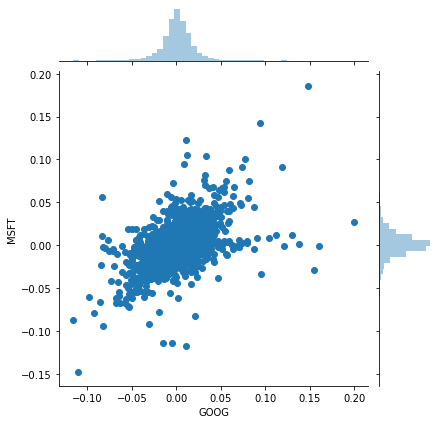

In [28]:
# To compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

### pairplot() for comparison between all 6 companies:
#### We can say that every tech company related to each other. If stock price of one company increases then it will affect other companies stocks.

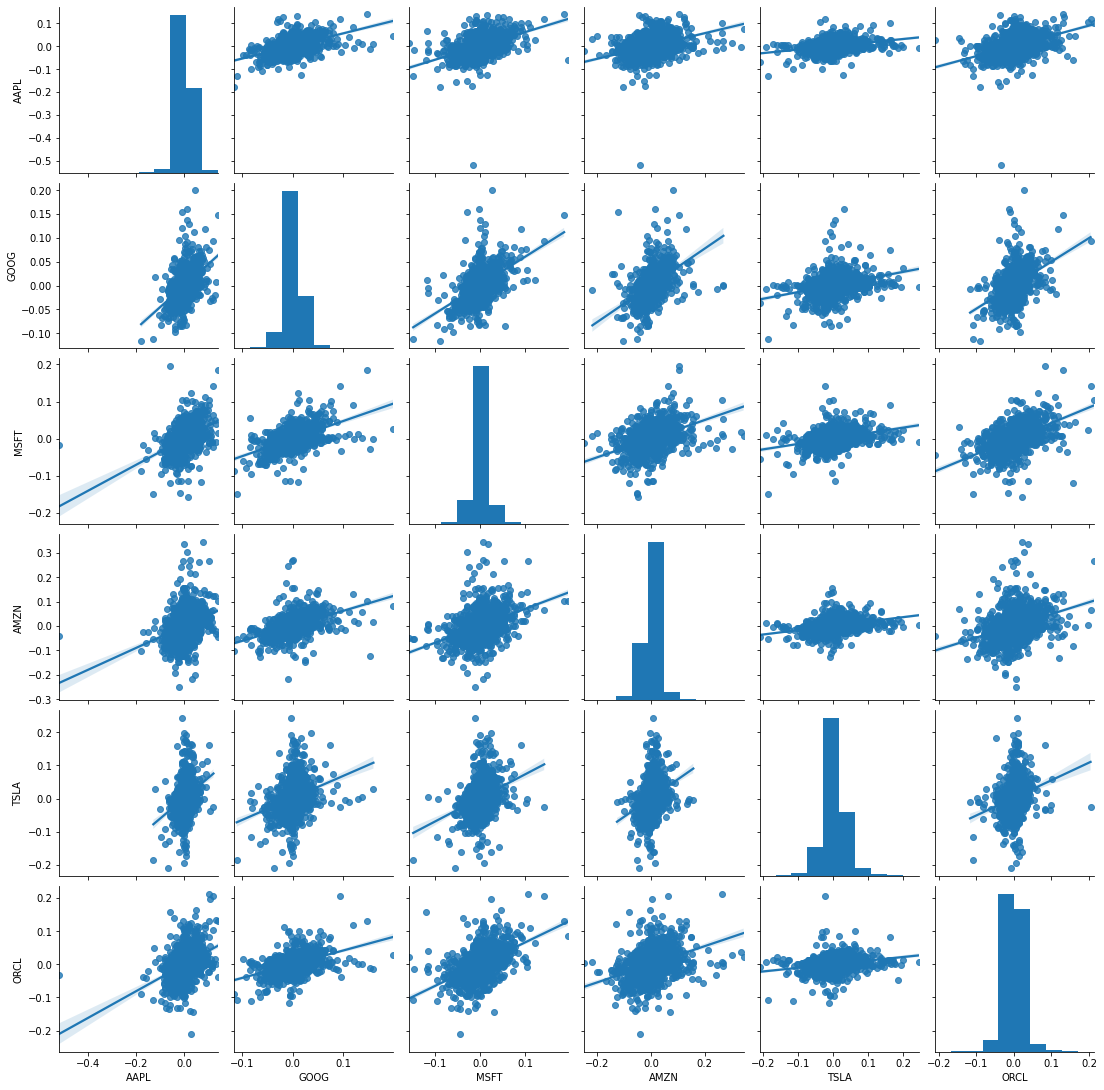

In [29]:
sns.pairplot(tech_rets, kind='reg')

#### I’ve used scatter plot from matplotlib package for upper triangle of the matrix and for lower triangle we’ve used kdeplot from seaborn package. This chart is same as pairplot() chart but the only difference is that I’ve used different charts to represent the relationship between the stocks.

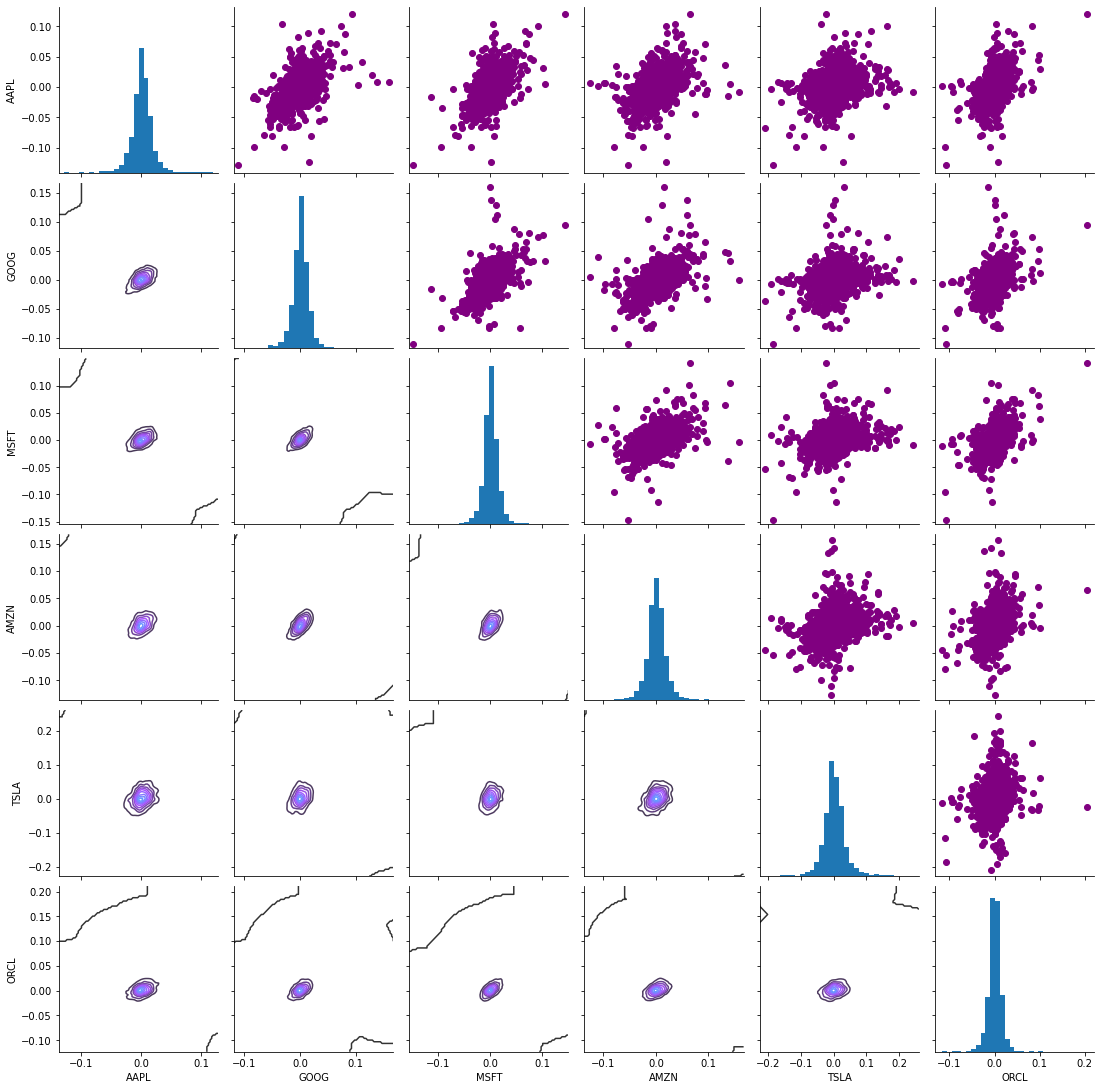

In [30]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

#### I’ve taken closing price instead of daily returns:

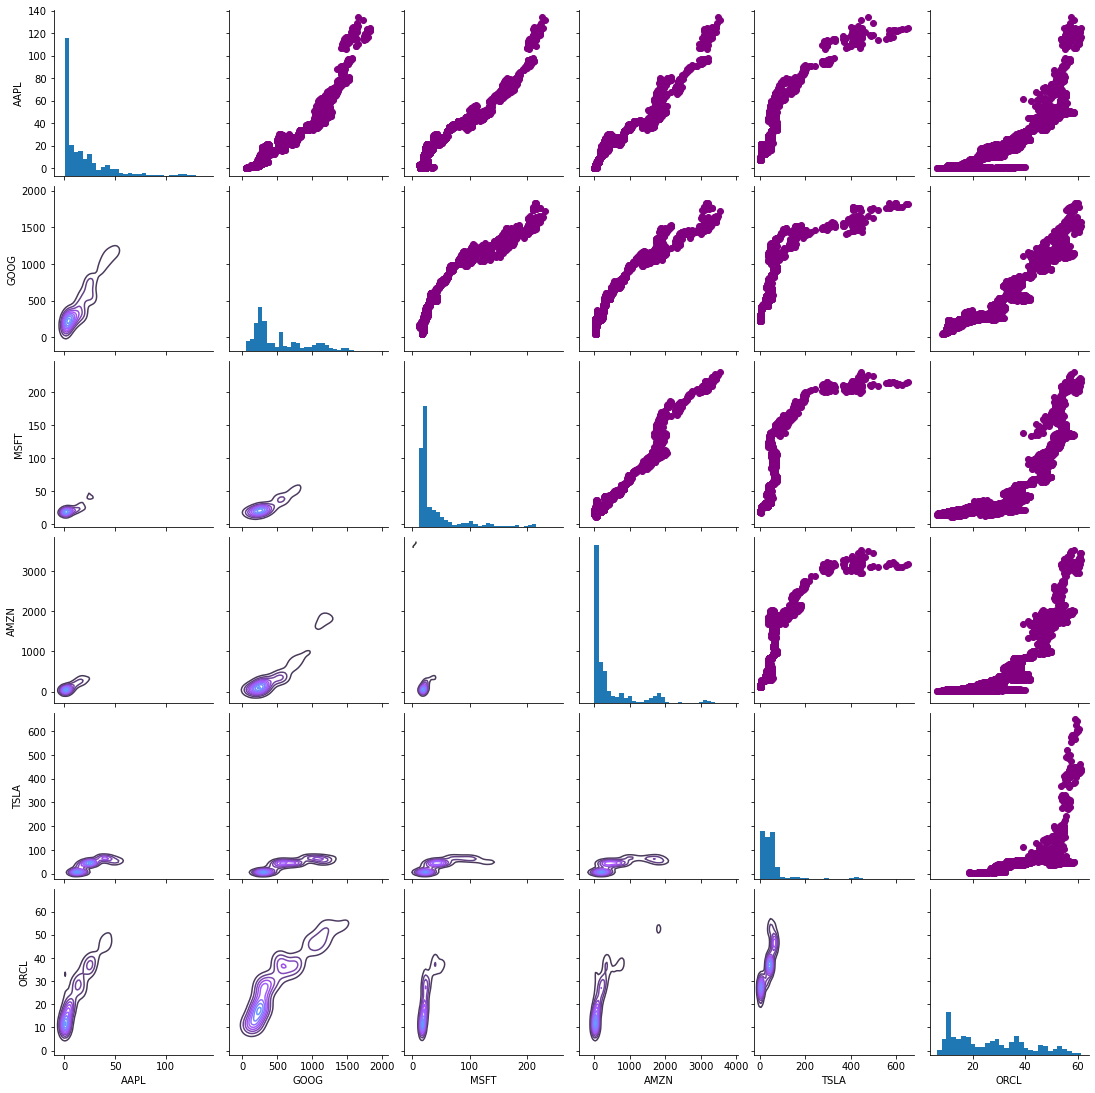

In [31]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

#### I’ve used a heatmap() from seaborn package to see the correlation between daily returns of the stocks from numerical point of view:

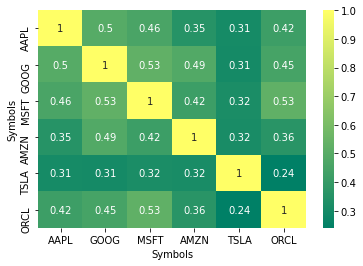

In [32]:
# Correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

#### I’ve used a heatmap() from seaborn package to see the correlation between closing price of the stocks from numerical point of view:

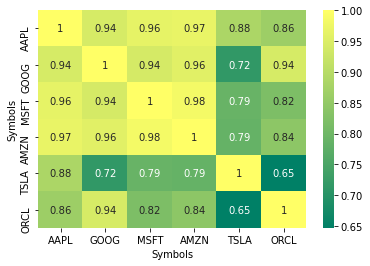

In [33]:
# Correlation plot for the closing price
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [34]:
def get(tech_list, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tech_list)
    
    return(pd.concat(datas, keys=tech_list, names=['Ticker', 'Date']))


tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'ORCL']
all_data = get(tech_list, start, end)
all_data.head()

High       Low      Open     Close       Volume  \
Ticker Date                                                              
AAPL   2000-01-03  1.004464  0.907924  0.936384  0.999442  535796800.0   
       2000-01-04  0.987723  0.903460  0.966518  0.915179  512377600.0   
       2000-01-05  0.987165  0.919643  0.926339  0.928571  778321600.0   
       2000-01-06  0.955357  0.848214  0.947545  0.848214  767972800.0   
       2000-01-07  0.901786  0.852679  0.861607  0.888393  460734400.0   

                   Adj Close  
Ticker Date                   
AAPL   2000-01-03   0.855168  
       2000-01-04   0.783068  
       2000-01-05   0.794528  
       2000-01-06   0.725771  
       2000-01-07   0.760149

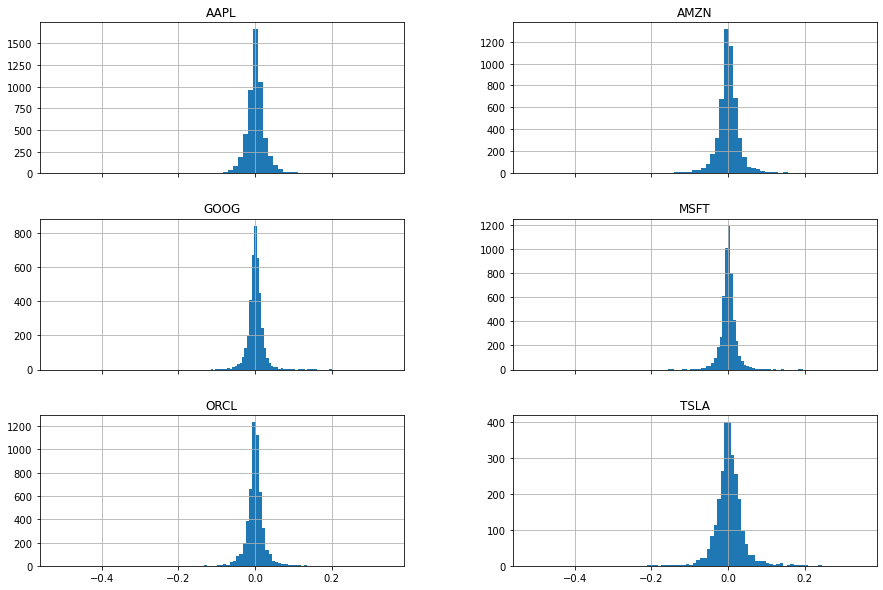

In [35]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(15,10))
plt.show()

#### Volatility Calculation:

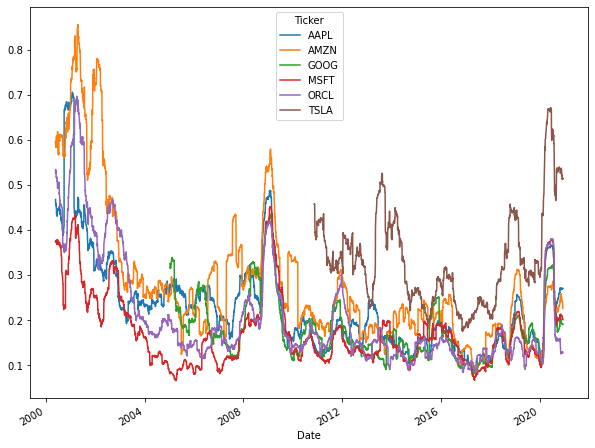

In [36]:
# Define the minumum of periods to consider 
min_periods = 100

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()